In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
data = pd.read_csv("50_Startups.csv")

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
data.rename(columns={"R&D Spend":"R&D_Spend","Marketing Spend":"Marketing_Spend"},inplace=True)
data.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-8-923b2491bff9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["R&D_Spend"])
<ipython-input-8-923b2491bff9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Administration"])
<ipython-input-8-923b2491bff9>:11: UserWarning: 

`distplot` is a deprecated function and wil

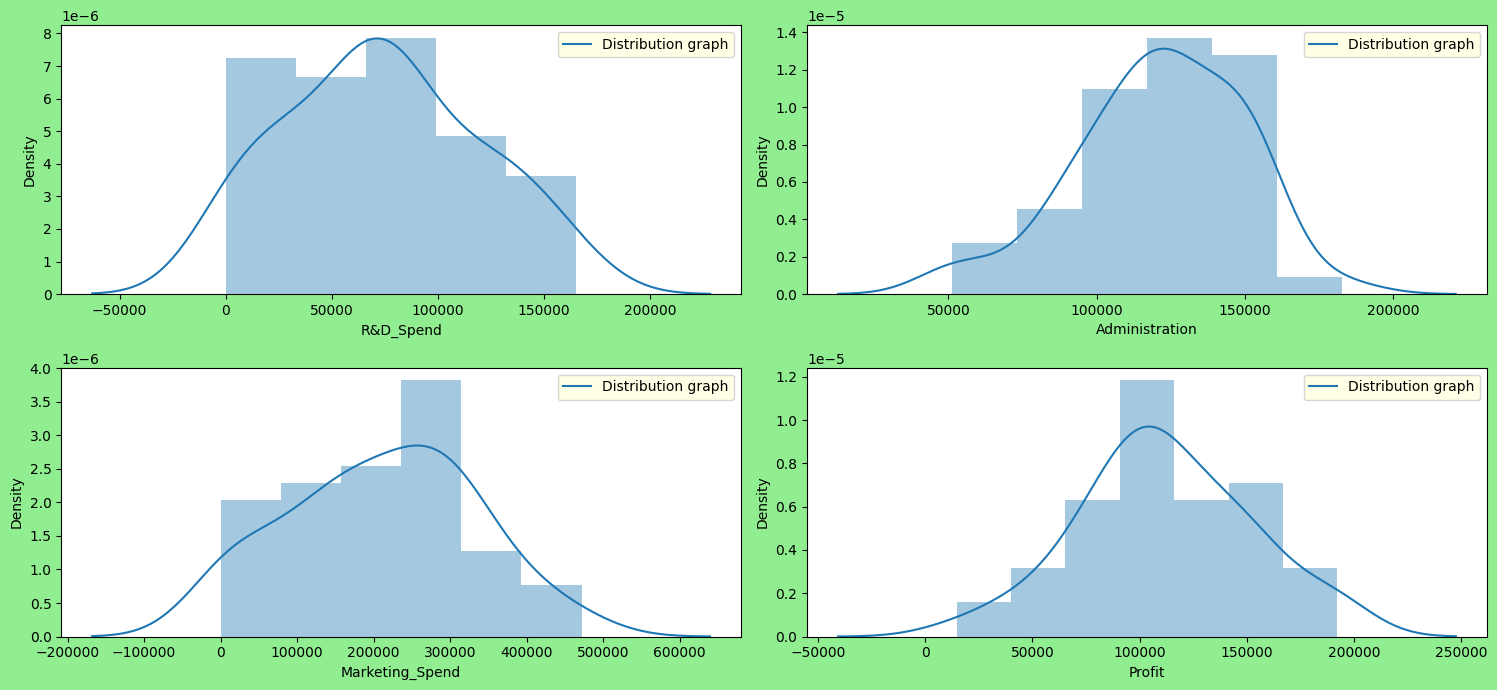

In [8]:
plt.figure(figsize=(15,7),facecolor="lightgreen")
plt.subplot(2,2,1)
sns.distplot(data["R&D_Spend"])
plt.legend(["Distribution graph"],loc="best",facecolor="lightyellow")

plt.subplot(2,2,2)
sns.distplot(data["Administration"])
plt.legend(["Distribution graph"],loc="best",facecolor="lightyellow")

plt.subplot(2,2,3)
sns.distplot(data["Marketing_Spend"])
plt.legend(["Distribution graph"],loc="best",facecolor="lightyellow")

plt.subplot(2,2,4)
sns.distplot(data["Profit"])
plt.legend(["Distribution graph"],loc="best",facecolor="lightyellow")

plt.tight_layout()

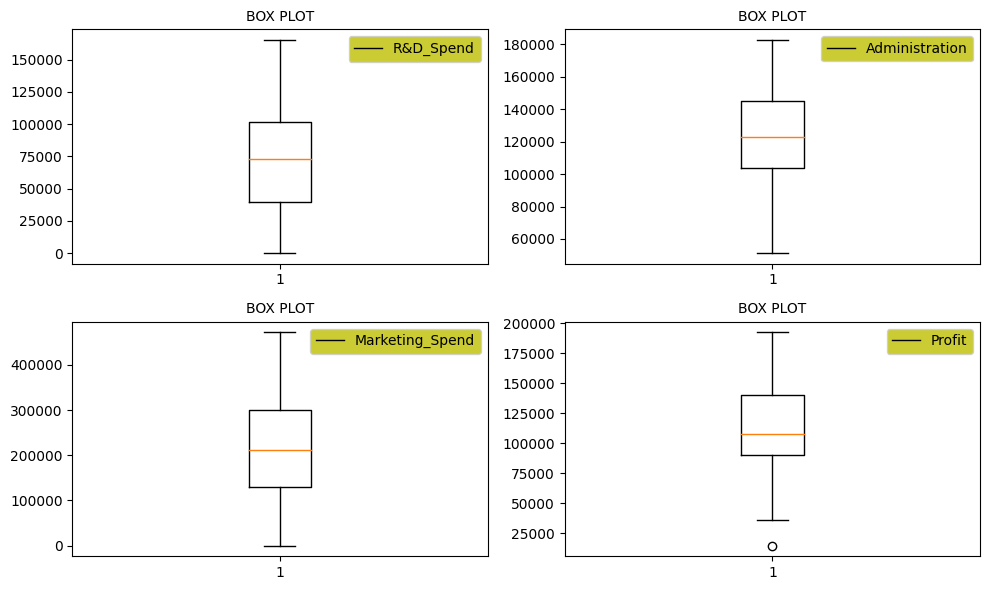

In [9]:
plt.figure(figsize=(10,6))

plt.style.use("default")
plt.subplot(2,2,1)
plt.boxplot(data["R&D_Spend"])
plt.title("BOX PLOT",color="Black",size=10)
plt.legend(["R&D_Spend"], loc='upper right',facecolor="y")


plt.subplot(2,2,2)
plt.boxplot(data["Administration"])
plt.title("BOX PLOT",color="Black",size=10)
plt.legend([ "Administration"], loc='upper right',facecolor="y")

plt.subplot(2,2,3)
plt.boxplot(data['Marketing_Spend'])
plt.title("BOX PLOT",color="Black",size=10)
plt.legend(["Marketing_Spend"], loc='upper right',facecolor="y")

plt.subplot(2,2,4)
plt.boxplot(data["Profit"])
plt.title("BOX PLOT",color="Black",size=10)
plt.legend(["Profit"], loc='upper right',facecolor="y")


plt.tight_layout()
plt.show()

<Axes: xlabel='State', ylabel='Profit'>

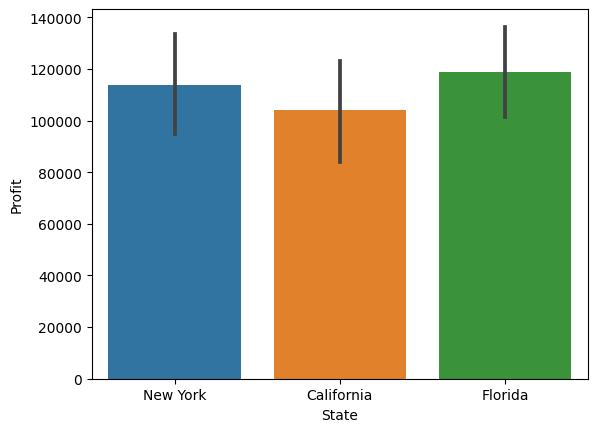

In [10]:
sns.barplot(x="State",y="Profit",data=data)

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<ipython-input-12-e1e0b148f1b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Reds)


<Axes: >

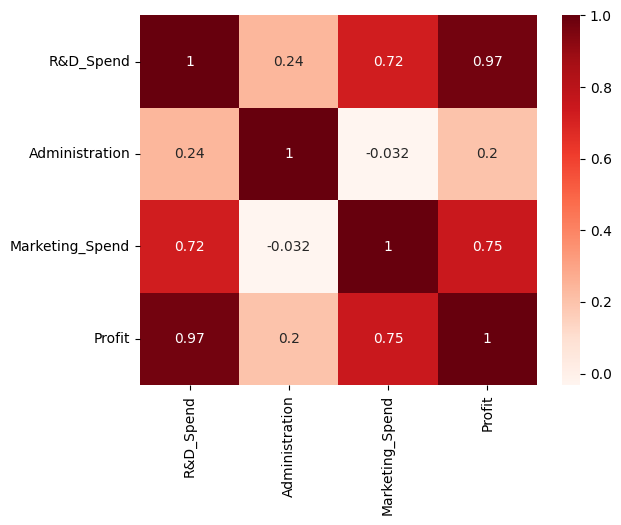

In [12]:
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Reds)

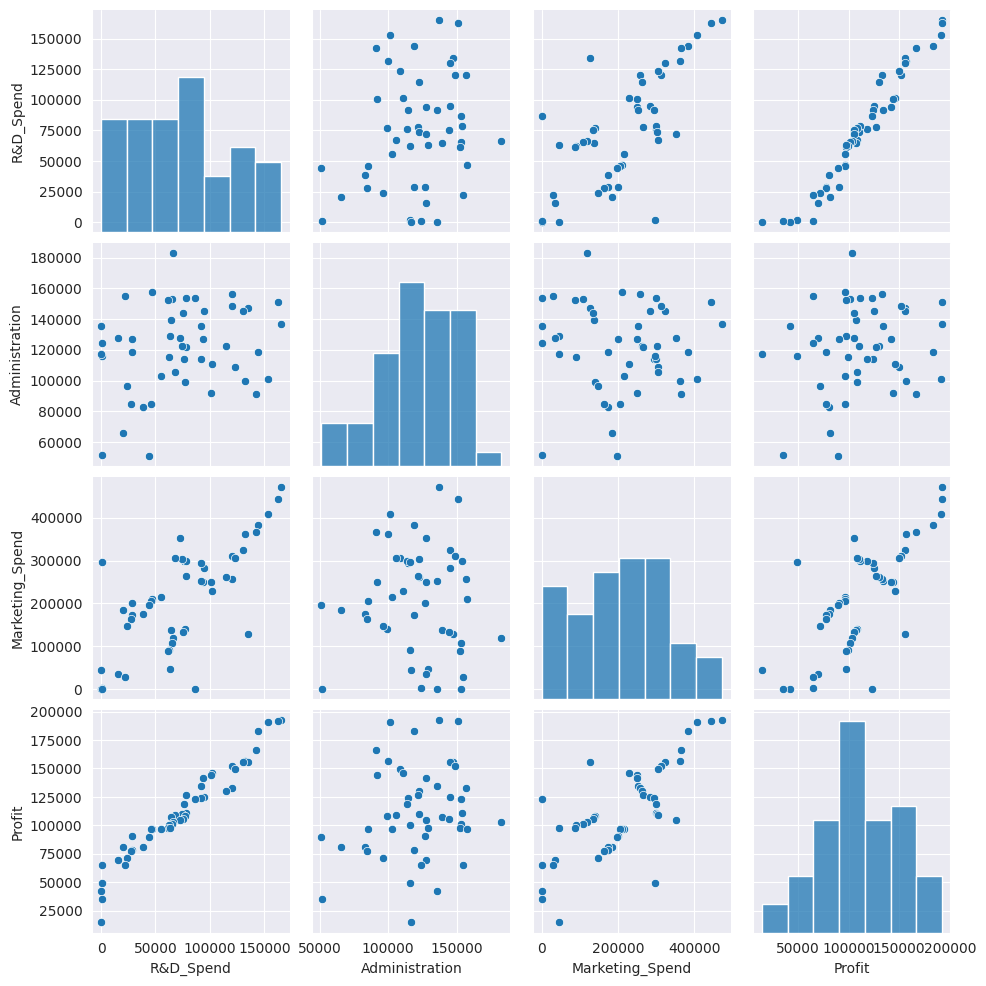

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(data)

In [23]:
x1=data["R&D_Spend"]
x2=data["Administration"]
x3=data["Marketing_Spend"]
y=data["Profit"]

In [16]:
rsquare_x1 = smf.ols("x1~x2+x3",data=data).fit()
rsquare_x1.rsquared

0.5949618224573936

In [17]:
rsquare_x2 = smf.ols("x2~x1+x3",data=data).fit()
rsquare_x2.rsquared

0.1490020823951752

In [18]:
rsquare_x3 = smf.ols("x3~x1+x2",data=data).fit()
rsquare_x3.rsquared

0.5702202685282504

In [22]:
#VIF
vif_x1 = 1/(1-rsquare_x1.rsquared)
vif_x2 = 1/(1-rsquare_x2.rsquared)
vif_x3 = 1/(1-rsquare_x3.rsquared)
d1 = {"x":["R&D_Spend","Administration","Marketing_Spend"],"VIF":[vif_x1,vif_x2,vif_x3]}
d1 = pd.DataFrame(d1)
d1

,x,VIF
0,R&D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [75]:
# no co_linearity in variable

Preparing a model


In [24]:
data.sample()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
21,78389.47,153773.43,299737.29,New York,111313.02


In [25]:
x1=data["R&D_Spend"]
x2=data["Administration"]
x3=data["Marketing_Spend"]
y=data["Profit"]

In [26]:
x1.sample(),x2.sample(),x3.sample(),y.sample()

(3    144372.41
 Name: R&D_Spend, dtype: float64,
 38    65947.93
 Name: Administration, dtype: float64,
 23    304768.73
 Name: Marketing_Spend, dtype: float64,
 36    90708.19
 Name: Profit, dtype: float64)

In [27]:
model1 = smf.ols("y~x1",data=data).fit()
model1.rsquared,model1.pvalues

(0.9465353160804393,
 Intercept    2.782697e-24
 x1           3.500322e-32
 dtype: float64)

In [28]:
model2 = smf.ols("y~x2",data=data).fit()
model2.rsquared,model2.pvalues

(0.04028714077757223,
 Intercept    0.003824
 x2           0.162217
 dtype: float64)

In [29]:
model3 = smf.ols("y~x3",data=data).fit()
model3.rsquared,model3.pvalues


(0.5591535746115515,
 Intercept    4.294735e-10
 x3           4.381073e-10
 dtype: float64)

In [30]:
df = {"R_2 value":[model1.rsquared,model2.rsquared,model3.rsquared],"P_Value Intercept":[model1.pvalues[0],model2.pvalues[0],model3.pvalues[0]],
      "P_value variable":[model1.pvalues[1],model2.pvalues[1],model3.pvalues[1]]}

In [31]:
df=pd.DataFrame(df)
df

,R_2 value,P_Value Intercept,P_value variable
0,0.946535,2.782697e-24,3.500322e-32
1,0.040287,3.823543e-03,1.622174e-01
2,0.559154,4.294735e-10,4.381073e-10


In [32]:
if model2.pvalues[1] <= 0.05:
  print("Administration variable is significantly impact on profit")
else:
  print("Administration variable is not significantly impact on profit")

Administration variable is not significantly impact on profit


In [33]:
model = smf.ols("y~x1+x3",data=data).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           2.16e-31
Time:                        05:12:53   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x3             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.50e-32
Time:                        18:06:35   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Cook's Distance



In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [37]:
K=3
N=50
(3*K)/N

0.18

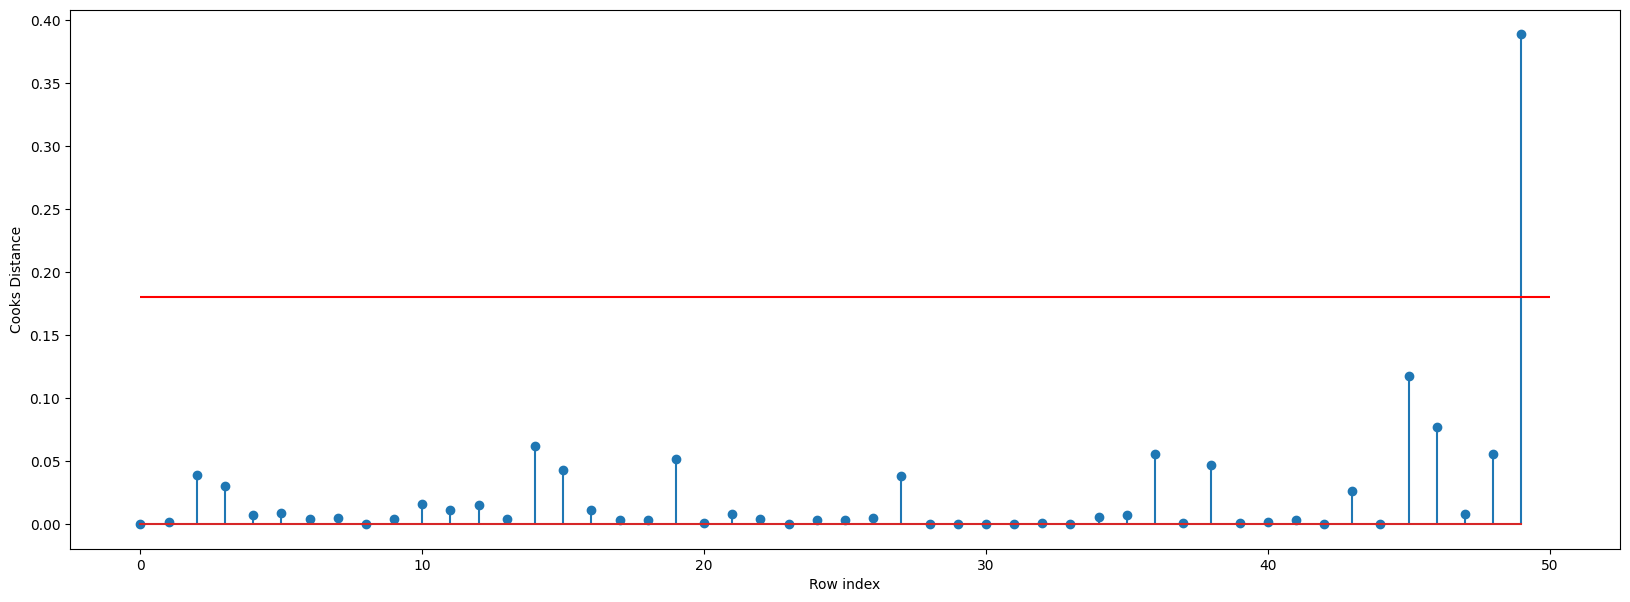

In [91]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.hlines(y=0.18,xmin=0,xmax=50,color="red")
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.where(c>=0.18)

(array([49]),)

In [ ]:
df.tail()

,R&D_Spend,Administration,Marketing_Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [ ]:
df1=df.drop([49],axis=0)

In [ ]:
df1.shape


(49, 4)

In [ ]:
y=df1["Profit"]
x1=df1['R&D_Spend']
x3=df1['Marketing_Spend']

In [ ]:
new_model = smf.ols("y~x1+x3",data=df1).fit()

In [ ]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           3.74e-33
Time:                        18:31:53   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
x1             0.7754      0.035     22.136      0.000       0.705       0.846
x3             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

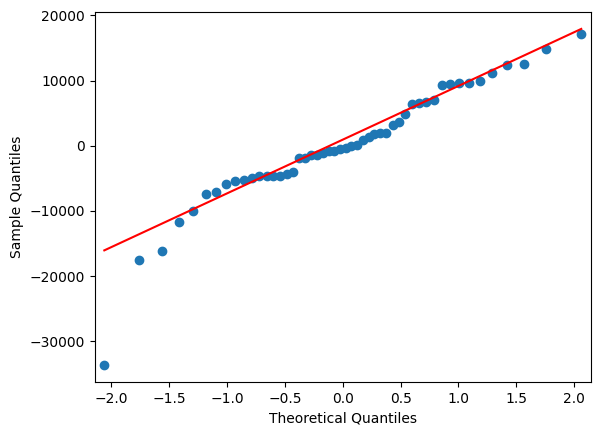

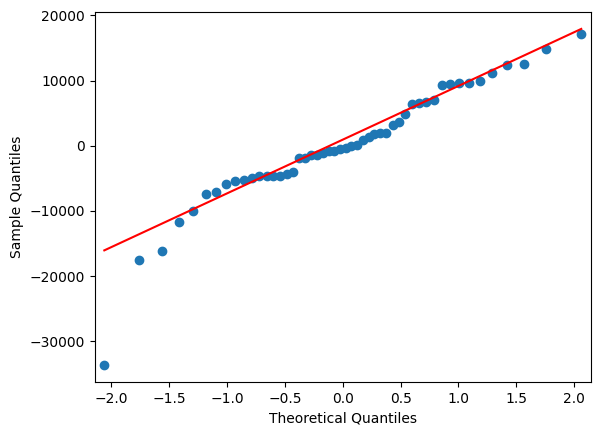

In [98]:
sm.qqplot(model.resid,line="q")

<ipython-input-104-28e2a6488249>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


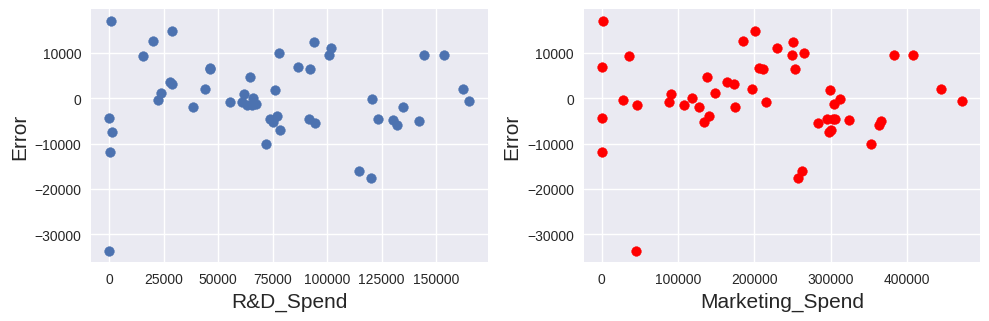

In [104]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn")
plt.subplot(2,2,1)
plt.scatter(x1,model.resid)
plt.xlabel("R&D_Spend",size=15)
plt.ylabel("Error",size=15)


plt.subplot(2,2,2)
plt.scatter(x3,model.resid,color="r")
plt.xlabel("Marketing_Spend",size=15)
plt.ylabel("Error",size=15)

plt.tight_layout()